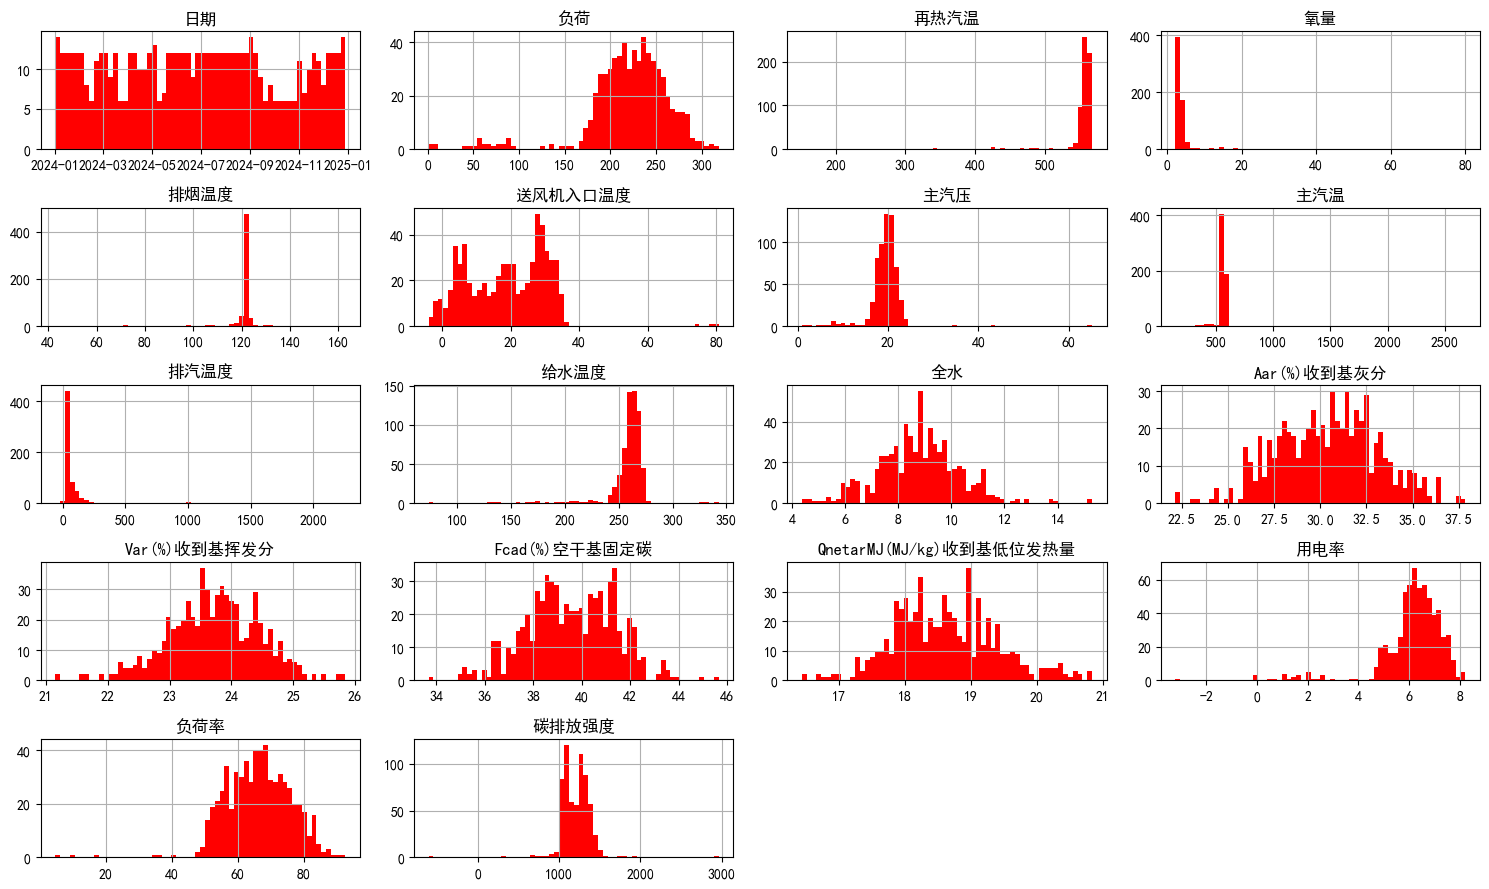

In [1]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
# 设置中文字体为 SimHei（黑体）
plt.rcParams['font.sans-serif'] = ['SimHei']  # 使用黑体 SimHei
plt.rcParams['axes.unicode_minus'] = False    # 解决负号显示问题
df=pd.read_excel("../data/数据整合cleaned_new.xlsx")
df.hist(bins=60, figsize=(15,9),color="red")
plt.tight_layout()
plt.show()

### 使用IQR方法去除异常值

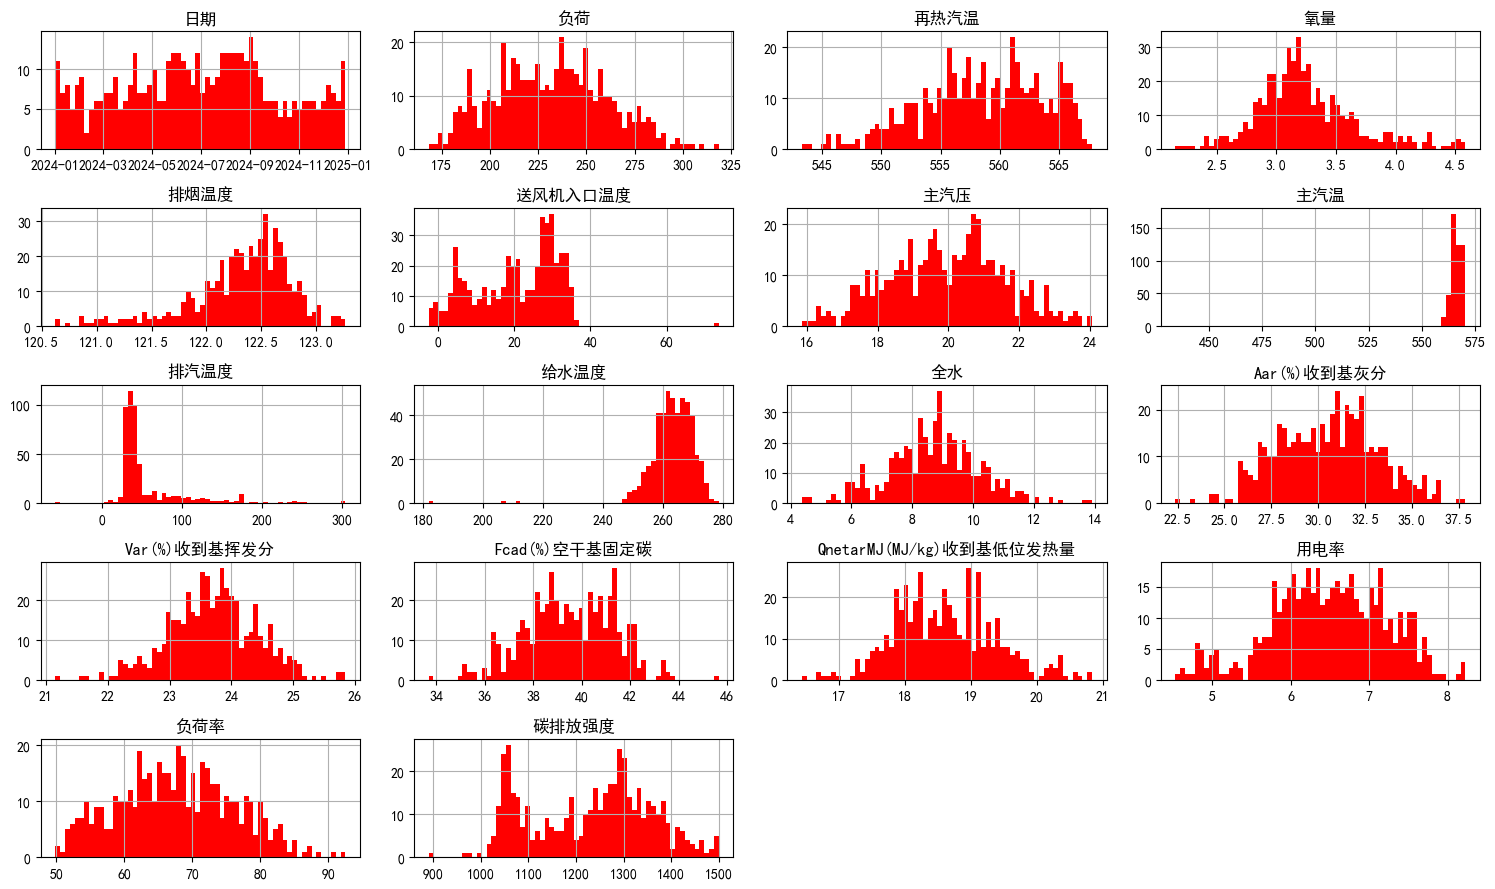

In [2]:
Q1_ZaiReQiWen = np.percentile(df["再热汽温"], 25)
Q3_ZaiReQiWen = np.percentile(df["再热汽温"],75)
IQR_ZaiReQiWen = Q3_ZaiReQiWen - Q1_ZaiReQiWen
outlier_step_ZaiReQiWen = 1.5 * IQR_ZaiReQiWen

Q1_YangLiang = np.percentile(df["氧量"], 25)
Q3_YangLiang = np.percentile(df["氧量"],75)
IQR_YangLiang = Q3_YangLiang - Q1_YangLiang
outlier_step_YangLiang = 1.5 * IQR_YangLiang

Q1_PaiYanWenDu = np.percentile(df["排烟温度"], 25)
Q3_PaiYanWenDu = np.percentile(df["排烟温度"],75)
IQR_PaiYanWenDu = Q3_PaiYanWenDu - Q1_PaiYanWenDu
outlier_step_PaiYanWenDu = 1.5 * IQR_PaiYanWenDu

Q1_TanPaiFangQiangDu = np.percentile(df["碳排放强度"], 25)
Q3_TanPaiFangQiangDu = np.percentile(df["碳排放强度"],75)
IQR_TanPaiFangQiangDu = Q3_TanPaiFangQiangDu - Q1_TanPaiFangQiangDu
outlier_step_TanPaiFangQiangDu = 1.5 * IQR_TanPaiFangQiangDu

df_out_1 = df[(df["再热汽温"]>=Q1_ZaiReQiWen-outlier_step_ZaiReQiWen) & (df["再热汽温"]<=Q3_ZaiReQiWen+outlier_step_ZaiReQiWen) &
                (df["氧量"]>=Q1_YangLiang-outlier_step_YangLiang) & (df["氧量"]<=Q3_YangLiang+outlier_step_YangLiang) &
                (df["排烟温度"]>=Q1_PaiYanWenDu-outlier_step_PaiYanWenDu) & (df["排烟温度"]<=Q3_PaiYanWenDu+outlier_step_PaiYanWenDu) & 
                (df["碳排放强度"]>=Q1_TanPaiFangQiangDu-outlier_step_TanPaiFangQiangDu) & (df["碳排放强度"]<=Q3_TanPaiFangQiangDu+outlier_step_TanPaiFangQiangDu) &
                (df["主汽温"]<1000) & (df["排汽温度"]<500) & (df["用电率"]>0)]

df_out_1.hist(bins=60, figsize=(15,9),color="red")
plt.tight_layout()
plt.show()

In [3]:
df_out_1.to_excel("../data/数据整合cleaned去除异常值_new.xlsx")